In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
offense_df=pd.read_csv("TeamOffense/clean_offense_stats.csv")
#defense_df=pd.read_csv()

In [4]:
#maybe i need to adjust for games played
#
offense_df=offense_df.iloc[:,1:]
#offense_df.head(14)

,Tm,G,PF,Total_Yds,Ply,Y/P,TO,FL,Total_1stD,Cmp,Pass_Att,Pass_yds,Pass_TD,Int,NY/A,Pass_1stD,Rush_Att,Rush_Yds,Rush_TD,Y/A,Rush_1stD,Pen,Penalty_Yds,Penalty_1stD,Sc%,TO%,Year
0,Chicago Bears,12.0,192.0,3317.0,760.0,4.4,21.0,0.0,140.0,73.0,221.0,1221.0,13.0,21.0,5.5,NaN,539.0,2096.0,13.0,3.9,140.0,0.0,354.0,NaN,NaN,NaN,1935.0
1,Detroit Lions,12.0,191.0,2693.0,674.0,4.0,20.0,0.0,121.0,57.0,142.0,920.0,9.0,20.0,6.5,NaN,532.0,1773.0,15.0,3.3,121.0,0.0,195.0,NaN,NaN,NaN,1935.0
2,Green Bay Packers,12.0,181.0,3011.0,678.0,4.4,27.0,0.0,125.0,93.0,230.0,1449.0,11.0,27.0,6.3,NaN,448.0,1562.0,7.0,3.5,125.0,0.0,295.0,NaN,NaN,NaN,1935.0
3,New York Giants,12.0,180.0,2400.0,651.0,3.7,19.0,0.0,112.0,69.0,154.0,947.0,10.0,19.0,6.1,NaN,497.0,1453.0,9.0,2.9,112.0,0.0,175.0,NaN,NaN,NaN,1935.0
4,Pittsburgh Pirates,12.0,100.0,1504.0,561.0,2.7,40.0,0.0,64.0,67.0,234.0,996.0,5.0,40.0,4.3,NaN,327.0,508.0,4.0,1.6,64.0,0.0,201.0,NaN,NaN,NaN,1935.0
5,Chicago Cardinals,12.0,99.0,2133.0,674.0,3.2,23.0,0.0,107.0,47.0,127.0,612.0,2.0,23.0,4.8,NaN,547.0,1521.0,6.0,2.8,107.0,0.0,255.0,NaN,NaN,NaN,1935.0
6,Brooklyn Dodgers,12.0,90.0,1826.0,545.0,3.4,23.0,0.0,90.0,52.0,178.0,718.0,5.0,23.0,4.0,NaN,367.0,1108.0,6.0,3.0,90.0,0.0,179.0,NaN,NaN,NaN,1935.0
7,Boston Redskins,11.0,65.0,2032.0,623.0,3.3,35.0,0.0,95.0,48.0,175.0,767.0,3.0,35.0,4.4,NaN,448.0,1265.0,5.0,2.8,95.0,0.0,166.0,NaN,NaN,NaN,1935.0
8,Philadelphia Eagles,11.0,60.0,1877.0,580.0,3.2,30.0,0.0,82.0,46.0,169.0,823.0,6.0,30.0,4.9,NaN,411.0,1054.0,2.0,2.6,82.0,0.0,330.0,NaN,NaN,NaN,1935.0
9,Avg Team,NaN,128.7,2310.3,638.4,3.6,26.4,0.0,104.0,61.3,181.1,939.2,7.1,26.4,5.2,NaN,457.3,1371.1,7.4,3.0,104.0,0.0,238.9,NaN,NaN,NaN,1935.0


In [15]:
#This is league totals, legue averages, league_avg_game
league_totals=offense_df.loc[offense_df["Tm"]=="League Total"]
league_averages=offense_df.loc[offense_df["Tm"]=="Avg Team"]
league_avg_game=offense_df.loc[offense_df["Tm"]=="Avg Tm/G"]
#offense_df_teams=offense_df.drop(league_totals)

In [36]:
#Stats without league averages. IE only teams. Negating a boolean mask with a tilda ~ didn't work so lets try returning values
#that are not equal to those subsets.

ind_teams_offense=offense_df.loc[(offense_df["Tm"]!="League Total")& (offense_df["Tm"]!="Avg Team") & (offense_df["Tm"]!="Avg Tm/G")]
#ind_teams_offense=offense_df.loc[offense_df["Tm"]!="Avg Team"]
#ind_teams_offense=offense_df.loc[offense_df["Tm"]!="Avg Tm/G"]


ind_teams_offense

,Tm,G,PF,Total_Yds,Ply,Y/P,TO,FL,Total_1stD,Cmp,Pass_Att,Pass_yds,Pass_TD,Int,NY/A,Pass_1stD,Rush_Att,Rush_Yds,Rush_TD,Y/A,Rush_1stD,Pen,Penalty_Yds,Penalty_1stD,Sc%,TO%,Year
0,Chicago Bears,12.0,192.0,3317.0,760.0,4.4,21.0,0.0,140.0,73.0,221.0,1221.0,13.0,21.0,5.5,NaN,539.0,2096.0,13.0,3.9,140.0,0.0,354.0,NaN,NaN,NaN,1935.0
1,Detroit Lions,12.0,191.0,2693.0,674.0,4.0,20.0,0.0,121.0,57.0,142.0,920.0,9.0,20.0,6.5,NaN,532.0,1773.0,15.0,3.3,121.0,0.0,195.0,NaN,NaN,NaN,1935.0
2,Green Bay Packers,12.0,181.0,3011.0,678.0,4.4,27.0,0.0,125.0,93.0,230.0,1449.0,11.0,27.0,6.3,NaN,448.0,1562.0,7.0,3.5,125.0,0.0,295.0,NaN,NaN,NaN,1935.0
3,New York Giants,12.0,180.0,2400.0,651.0,3.7,19.0,0.0,112.0,69.0,154.0,947.0,10.0,19.0,6.1,NaN,497.0,1453.0,9.0,2.9,112.0,0.0,175.0,NaN,NaN,NaN,1935.0
4,Pittsburgh Pirates,12.0,100.0,1504.0,561.0,2.7,40.0,0.0,64.0,67.0,234.0,996.0,5.0,40.0,4.3,NaN,327.0,508.0,4.0,1.6,64.0,0.0,201.0,NaN,NaN,NaN,1935.0
5,Chicago Cardinals,12.0,99.0,2133.0,674.0,3.2,23.0,0.0,107.0,47.0,127.0,612.0,2.0,23.0,4.8,NaN,547.0,1521.0,6.0,2.8,107.0,0.0,255.0,NaN,NaN,NaN,1935.0
6,Brooklyn Dodgers,12.0,90.0,1826.0,545.0,3.4,23.0,0.0,90.0,52.0,178.0,718.0,5.0,23.0,4.0,NaN,367.0,1108.0,6.0,3.0,90.0,0.0,179.0,NaN,NaN,NaN,1935.0
7,Boston Redskins,11.0,65.0,2032.0,623.0,3.3,35.0,0.0,95.0,48.0,175.0,767.0,3.0,35.0,4.4,NaN,448.0,1265.0,5.0,2.8,95.0,0.0,166.0,NaN,NaN,NaN,1935.0
8,Philadelphia Eagles,11.0,60.0,1877.0,580.0,3.2,30.0,0.0,82.0,46.0,169.0,823.0,6.0,30.0,4.9,NaN,411.0,1054.0,2.0,2.6,82.0,0.0,330.0,NaN,NaN,NaN,1935.0
12,Green Bay Packers,12.0,248.0,3293.0,745.0,4.4,19.0,0.0,148.0,108.0,255.0,1629.0,17.0,19.0,6.4,NaN,490.0,1664.0,11.0,3.4,148.0,0.0,478.0,NaN,NaN,NaN,1936.0


In [24]:
#42-43 WW2
#46-47
#work strike year 20.2ppg
#2020 is the max score avg ppg at 24.8
league_avg_game

,Tm,G,PF,Total_Yds,Ply,Y/P,TO,FL,Total_1stD,Cmp,Pass_Att,Pass_yds,Pass_TD,Int,NY/A,Pass_1stD,Rush_Att,Rush_Yds,Rush_TD,Y/A,Rush_1stD,Pen,Penalty_Yds,Penalty_1stD,Sc%,TO%,Year
11,Avg Tm/G,NaN,10.9,196.2,54.2,3.6,2.2,0.0,8.8,5.2,15.4,79.7,0.6,2.2,5.2,NaN,38.8,116.4,0.6,3.0,8.8,0.0,20.3,NaN,NaN,NaN,1935.0
23,Avg Tm/G,NaN,11.9,225.3,56.6,4.0,2.0,0.0,10.8,5.6,15.3,83.0,0.6,2.0,5.4,NaN,41.2,142.3,0.7,3.5,10.8,0.0,26.0,NaN,NaN,NaN,1936.0
36,Avg Tm/G,NaN,12.9,219.9,55.2,4.0,1.9,0.0,10.0,6.3,16.5,93.0,0.8,1.9,5.6,NaN,38.7,126.9,0.6,3.3,10.0,0.0,25.2,NaN,NaN,NaN,1937.0
49,Avg Tm/G,NaN,13.5,230.4,56.1,4.1,2.0,0.0,10.8,7.5,18.5,105.8,0.8,2.0,5.7,NaN,37.7,124.6,0.8,3.3,10.8,0.0,25.9,NaN,NaN,NaN,1938.0
62,Avg Tm/G,NaN,15.4,249.4,57.4,4.3,1.9,0.0,11.1,8.7,20.3,128.8,0.9,1.9,6.3,NaN,37.0,120.6,0.9,3.3,11.1,0.0,25.1,NaN,NaN,NaN,1939.0
75,Avg Tm/G,NaN,15.1,245.0,58.1,4.2,2.0,0.0,11.5,8.8,20.5,125.3,0.9,2.0,6.1,NaN,37.6,119.6,0.9,3.2,11.5,0.0,30.6,NaN,NaN,NaN,1940.0
88,Avg Tm/G,NaN,16.5,238.5,57.1,4.2,3.1,1.1,11.6,8.9,20.1,121.8,0.9,2.0,6.1,4.4,37.1,116.7,1.0,3.2,6.4,4.3,38.3,0.8,NaN,NaN,1941.0
101,Avg Tm/G,NaN,15.9,246.8,57.3,4.3,3.0,1.1,11.8,9.0,20.4,123.7,1.0,2.0,6.1,4.6,36.8,123.1,0.9,3.3,6.3,4.8,40.1,0.9,NaN,NaN,1942.0
114,Avg Tm/G,NaN,19.5,259.7,58.5,4.4,3.2,0.9,11.7,9.6,21.7,141.4,1.4,2.3,6.5,4.5,36.8,118.3,1.1,3.2,6.3,5.5,44.8,0.9,NaN,NaN,1943.0
127,Avg Tm/G,NaN,18.0,248.2,58.4,4.3,3.5,1.1,11.5,9.1,21.1,129.3,1.2,2.3,6.1,4.6,37.2,119.0,1.2,3.2,6.0,6.9,53.6,0.9,NaN,NaN,1944.0


In [7]:
#np.where chechs your condition and returns the following values based on if they fufill conditions or not
#in this case I want to return True every year Rushing yards exceeds passing yards

league_averages['Rush_Yds_Greater'] = np.where(league_averages["Rush_Yds"] > league_averages['Pass_yds'],True,False)
#1935-1938,1956,1973,1977
league_averages.loc[league_averages["Rush_Yds_Greater"]==True]

C:\Users\natha\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Tm,G,PF,Total_Yds,Ply,Y/P,TO,FL,Total_1stD,Cmp,Pass_Att,Pass_yds,Pass_TD,Int,NY/A,Pass_1stD,Rush_Att,Rush_Yds,Rush_TD,Y/A,Rush_1stD,Pen,Penalty_Yds,Penalty_1stD,Sc%,TO%,Year,Rush_Yds_Greater
9,Avg Team,NaN,128.7,2310.3,638.4,3.6,26.4,0.0,104.0,61.3,181.1,939.2,7.1,26.4,5.2,NaN,457.3,1371.1,7.4,3.0,104.0,0.0,238.9,NaN,NaN,NaN,1935.0,True
21,Avg Team,NaN,142.7,2703.3,678.8,4.0,24.0,0.0,129.6,67.1,184.0,995.6,7.4,24.0,5.4,NaN,494.8,1707.8,8.6,3.5,129.6,0.0,311.4,NaN,NaN,NaN,1936.0,True
34,Avg Team,NaN,142.4,2418.6,607.7,4.0,20.6,0.0,109.8,69.7,181.5,1022.7,9.0,20.6,5.6,NaN,426.2,1395.9,6.7,3.3,109.8,0.0,277.5,NaN,NaN,NaN,1937.0,True
47,Avg Team,NaN,148.4,2534.9,617.3,4.1,22.1,0.0,119.0,82.4,203.0,1164.1,9.3,22.1,5.7,NaN,414.3,1370.8,8.3,3.3,119.0,0.0,284.6,NaN,NaN,NaN,1938.0,True
296,Avg Team,NaN,244.6,3638.7,748.8,4.9,33.3,13.3,206.2,138.0,273.5,1770.9,13.5,20.0,6.0,89.0,454.4,1867.8,14.9,4.1,103.3,58.4,530.2,13.9,NaN,NaN,1956.0,True
633,Avg Team,NaN,272.3,3994.3,870.8,4.6,34.1,16.0,232.0,177.0,340.2,1973.0,14.5,18.1,5.3,104.1,497.5,2021.3,12.7,4.1,111.2,71.0,664.3,16.8,NaN,NaN,1973.0,True
753,Avg Team,NaN,240.5,4000.7,906.8,4.4,35.6,15.5,236.4,179.4,349.5,1986.4,13.9,20.1,5.2,107.4,523.2,2014.3,12.6,3.8,110.4,90.8,778.5,18.6,NaN,NaN,1977.0,True


In [9]:
league_averages[["Year","Pass_yds","Rush_Yds"]]

,Year,Pass_yds,Rush_Yds
9,1935.0,939.2,1371.1
21,1936.0,995.6,1707.8
34,1937.0,1022.7,1395.9
47,1938.0,1164.1,1370.8
60,1939.0,1416.8,1326.9
73,1940.0,1378.8,1316.0
86,1941.0,1339.7,1284.0
99,1942.0,1360.8,1354.1
112,1943.0,1130.8,946.4
125,1944.0,1175.0,1081.7


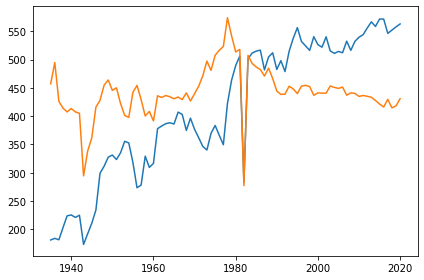

In [10]:
#1982 there was a player strike of only 9 games
#league_averages[["Pass_yds","Year"]]
x=league_averages["Year"]
y=league_averages["Pass_yds"]
y2=league_averages["Rush_Yds"]
y3=league_averages["Penalty_Yds"]
y4=league_averages["Rush_TD"]
y5=league_averages["Pass_TD"]
y6=league_averages["Pass_Att"]
y7=league_averages["Rush_Att"]
y8=league_averages["TO"]
fig,ax=plt.subplots()
#plt.label("Years")
#xlim((left, right))
for y in [y6,y7]:
    ax.plot(x, y)

#ax[1].plot(x,y2)
#ax[2].plot(x,y3)
#plt.xticks(np.arange(min(x), max(x)+1, 10.0))
#plt.yticks(np.arange(0, 4500, 500.0))
plt.tight_layout()

In [ ]:
#Maybe stats per game is a better story
x=league_averages["Year"]
y=league_averages["Pass_yds"]
y2=league_averages["Rush_Yds"]
y3=league_averages["Penalty_Yds"]
y4=league_averages["Rush_TD"]
y5=league_averages["Pass_TD"]
y6=league_averages["Pass_Att"]
y7=league_averages["Rush_Att"]
y8=league_averages["TO"]

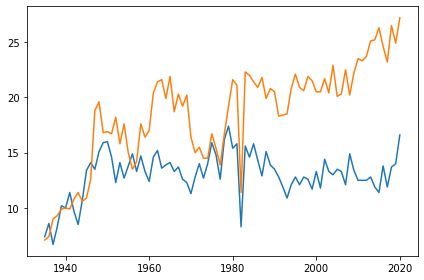

In [11]:
#rushing tds vs passing tds
fig,ax=plt.subplots()
for y in [y4,y5]:
    ax.plot(x, y)
plt.tight_layout()

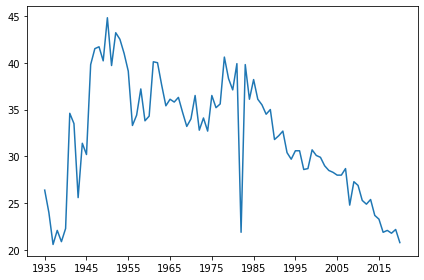

In [25]:
#Turnovers Peak sometime around 1950 and decline consistently 
fig,ax=plt.subplots()
for y in [y8]:
    ax.plot(x, y)
plt.xticks(np.arange(min(x), max(x)+1, 10.0))
plt.tight_layout()

In [13]:
"""
Notes/Insights
In presentation go from EDA--->Observations with socring and turnovers---->Conclusions
Currently in raw statistics. Would be interesting in my oppinion to look at adjusted stats. 
Maybe I can write a line of code that adjusts stats to a 16 game season and map it to all years? 
Offensive Penalties don't really change too much overtime outside of year to year violatility
Rushing accounted for more yards very early on, and peaked in year() #1935-1938,1956,1973,1977
Passing started out less prevelant than rushing and
Look into penalties and penalty yardage over time for offense vs defense
Bar chart of chart for percentge of total points from passig tds and rushing tds
MEL BLOUNT RULE -1978
33 years  1978-2020 is 42 years
1978- the advent of a 16 game season.
1982 is a work strike so only 9games played"""

"\nNotes/Insights\nCurrently in raw statistics. Would be interesting in my oppinion to look at adjusted stats. \nMaybe I can write a line of code that adjusts stats to a 16 game season and map it to all years? \nOffensive Penalties don't really change too much overtime outside of year to year violatility\nRushing accounted for more yards very early on, and peaked in year() #1935-1938,1956,1973,1977\nPassing started out less prevelant than rushing and\nLook into penalties and penalty yardage over time for offense vs defense\n\n1978- the advent of a 16 game season.\n1982 is a work strike so only 9games played"

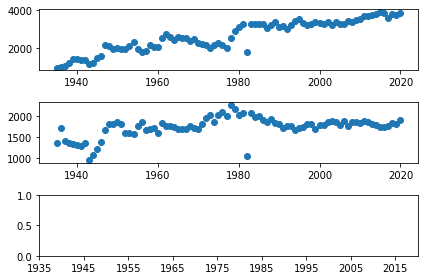

In [14]:
x=league_averages["Year"]
y=league_averages["Pass_yds"]
y2=league_averages["Rush_Yds"]
y3=league_averages["Penalty_Yds"]
fig,ax=plt.subplots(3)
#xlim((left, right))
plt.xlim(1935,2020)
ax[0].scatter(x,y)
ax[1].scatter(x,y2)
#ax[2].scatter(x,y3)
plt.xticks(np.arange(min(x), max(x)+1, 10.0))
plt.tight_layout()


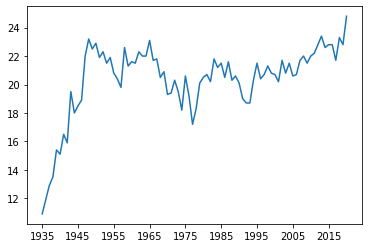

In [26]:
#Avg points per game over time
#Actually nto much change outside of violatility from ~1950-2020
#1948
x=league_avg_game["Year"]
y=league_avg_game["PF"]
fig,ax=plt.subplots()
plt.xticks(np.arange(min(x), max(x)+1, 10.0))
ax.plot(x,y);

In [ ]:
"""
If we assume the means are correct they re from same distribution.
H0:
HA:
#I don't have enough enough power at 80%
but at 50% power i can interpret the p value , so i t doesn't have as much weight
#meaningfull
metric league mean average ppg 
2 samples 
1945 and 2020 and look at the averages and do t-test
or snapshots. 

the 20 year averages and have the means for both and look at the differences btween the means
18ppg and 20ppg 2ppg so similiar and how likely is it for me to see a differnece if both samples
came from the same distribution
ttest and pass both raw data as samples.

If period is of unequal length theres an adjustment I need to do welch adjustment
because sample is different n values. in https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html equal variences=False



#bonferoni correction
0.05 alpha this is a billion dollar buisness
this is relevant because stats influence personel you draft
Power analysis
Bootstrap
0.8power or 20% chance of type2 error 
t-test """

# Power

In [42]:
#Sampling distributions
#pre_rule_change 1935-1977
#post_rule_change 1978-2020

pre_rule_change = ind_teams_offense.loc[ind_teams_offense["Year"] <1978]
post_rule_change = ind_teams_offense.loc[ind_teams_offense["Year"] >=1978]
print(f"Pre Rule Change Sample Size {len(pre_rule_change)} \nPost Rule Change Sample Size {len(post_rule_change)}
        \n")

Pre Rule Change Sample Size 627 
Post Rule Change Sample Size 1297


In [50]:
mu_pre=254.644338
n_pre=254
sigma_pre =79.290722

pre_rule_change.iloc[:,2].describe()


count    627.000000
mean     254.644338
std       79.290722
min        0.000000
25%      203.000000
50%      258.000000
75%      309.000000
max      466.000000
Name: PF, dtype: float64

In [53]:
mu_post=336.446415
n_post=1297
sigma_post= 72.383018
post_rule_change.iloc[:,2].describe()

count    1297.000000
mean      336.446415
std        72.383018
min       113.000000
25%       287.000000
50%       335.000000
75%       381.000000
max       606.000000
Name: PF, dtype: float64

In [ ]:
#Need to compute power. Target is 0.8 if not need to explain this in presentation 

def compute_power(n, sigma, alpha, mu0, mua):
    standard_error = sigma / n**0.5
    h0 = scs.norm(mu0, standard_error)
    ha = scs.norm(mua, standard_error)
    critical_value = h0.ppf(1 - alpha)
    power = 1 - ha.cdf(critical_value)
    return power
print(f"Power for Post Rule Change Sample: {compute_power()} )

In [ ]:
#scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')